[Click here to access the dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [65]:
import pandas as pd # to handle tabular data
import numpy as np # to handle array
import seaborn as sns # make visualization more appealing
import matplotlib.pyplot as plt # base of visualization

from sklearn.metrics import confusion_matrix # to plot confusion matrix

# Read Data

In [66]:
# read test data
test_df = pd.read_csv("Dataset/test.csv").iloc[:,:]

# separate feature and class label
X_test = test_df.iloc[:, 1:]

## mapping fitur diagnose
# malignant menjadi kelas positif dan benign menjadi kelas negatif
diagnose_map = {"M": 1, "B": 0}

In [67]:
# Read train data
train_df = pd.read_csv('Dataset/train.csv', na_values="?").iloc[:, 1:]

# output general information of each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                463 non-null    object 
 1   radius_mean              463 non-null    float64
 2   texture_mean             463 non-null    float64
 3   perimeter_mean           463 non-null    float64
 4   area_mean                463 non-null    float64
 5   smoothness_mean          463 non-null    float64
 6   compactness_mean         463 non-null    float64
 7   concavity_mean           456 non-null    float64
 8   concave points_mean      456 non-null    float64
 9   symmetry_mean            463 non-null    float64
 10  fractal_dimension_mean   463 non-null    float64
 11  radius_se                463 non-null    float64
 12  texture_se               463 non-null    float64
 13  perimeter_se             463 non-null    float64
 14  area_se                  4

In [68]:
## get column with NaN value for futher inspection
cols_with_nan = [k for (k, v) in dict(train_df.isna().sum()).items() if v > 0]

# output the column and index
print(f"{'=' * 25} NaN Index {'=' * 25}")
for nan_col in cols_with_nan:
    idx_nan = list(train_df.loc[train_df[nan_col].isna()].index)
    if (len(nan_col) <= 15):
        print(f"{nan_col}\t\t:{idx_nan}")
    else:
        print(f"{nan_col}\t:{idx_nan}")

========================= NaN Index =========================
concavity_mean		:[101, 140, 174, 175, 192, 314, 391]
concave points_mean	:[101, 140, 174, 175, 192, 314, 391]
concavity_se		:[101, 140, 174, 175, 192, 314, 391]
concave points_se	:[101, 140, 174, 175, 192, 314, 391]
concavity_worst		:[101, 140, 174, 175, 192, 314, 391]
concave points_worst	:[101, 140, 174, 175, 192, 314, 391]


Kolom dengan NaN semuanya berkaitan dengan "concave", berarti ada kemungkinan bahwa pasien tersebut tidak memiliki concave sehingga diisi dengan angka 0 saja.

In [69]:
# Mengisi nilai NaN barusan dengan angka 0
train_df.fillna(0, inplace = True)

# EDA

Banyaknya B: 275
Banyaknya M: 188


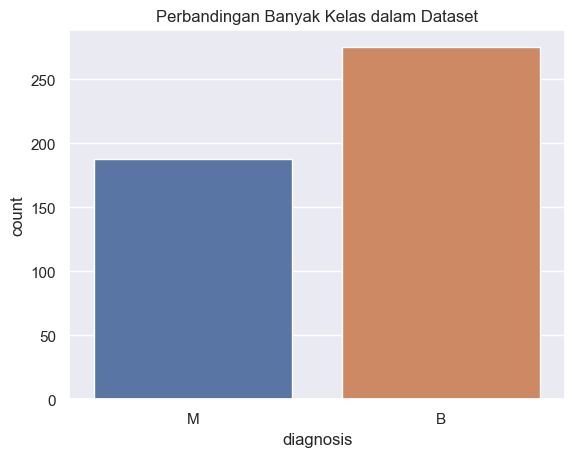

In [70]:
# output count of positive and negative class
temp = train_df["diagnosis"].value_counts()
for key, value in temp.items():
    print(f"Banyaknya {key}: {value}")

# set theme from seaborn
sns.set_theme()
# plot the count from each classes
sns.countplot(data = train_df, x = train_df['diagnosis'])

# give decoration
plt.title("Perbandingan Banyak Kelas dalam Dataset")
plt.show()

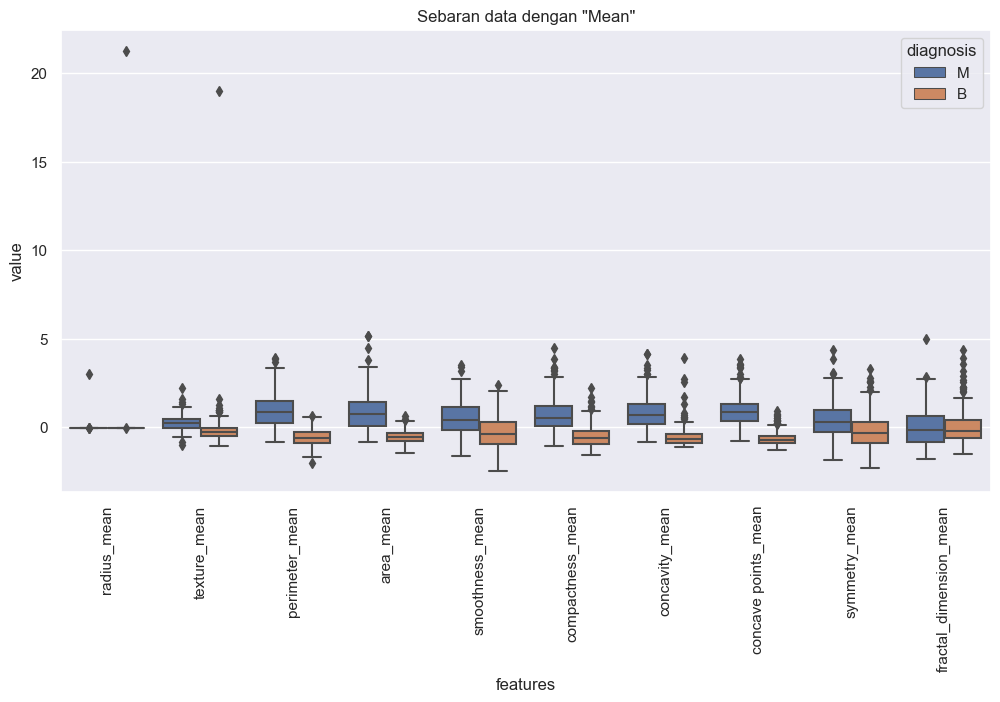

In [71]:
#Slice dataset feature witih "mean" suffix
df_mean = train_df.select_dtypes(['int', 'float']).iloc[:, 0:10]

# standardize
df_mean = (df_mean - df_mean.mean()) / df_mean.std()

# concat the sliced dataset with target class
df_mean = pd.concat([df_mean, train_df[['diagnosis']]], axis=1)
df_mean = pd.melt(df_mean, id_vars='diagnosis', var_name='features', value_name='value')

# box plot visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'features', y = 'value', hue='diagnosis', data=df_mean)
plt.xticks(rotation = 90)

# give title to the plot
plt.title("Sebaran data dengan \"Mean\"")
plt.show()

In [72]:
## masking for the very very far outliers from radius_mean and texture_mean

# first very far outlier and mask it into top whisker of box plot
idx_out = np.where(train_df['radius_mean'] == train_df['radius_mean'].max())[0][0]
Q3 = np.percentile(train_df['radius_mean'], 75); Q1 = np.percentile(train_df['radius_mean'], 25)
fill = Q3 + 1.5 * (Q3 - Q1)

# masking
train_df['radius_mean'][idx_out] = fill

# second very far outlier and mask it into top whisker of box plot
idx_out = np.where(train_df['radius_mean'] == train_df['radius_mean'].max())[0][0]
Q3 = np.percentile(train_df['radius_mean'], 75); Q1 = np.percentile(train_df['radius_mean'], 25)
fill = Q3 + 1.5 * (Q3 - Q1)

# masking
train_df['radius_mean'][idx_out] = fill

# first very far outlier and mask it into top whisker of box plot
idx_out = np.where(train_df['texture_mean'] == train_df['texture_mean'].max())[0][0]
Q3 = np.percentile(train_df['texture_mean'], 75); Q1 = np.percentile(train_df['texture_mean'], 25)
fill = Q3 + 1.5 * (Q3 - Q1)

# masking
train_df['texture_mean'][idx_out] = fill

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25276\2773717182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['radius_mean'][idx_out] = fill
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25276\2773717182.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['radius_mean'][idx_out] = fill
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25276\2773717182.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['texture_mea

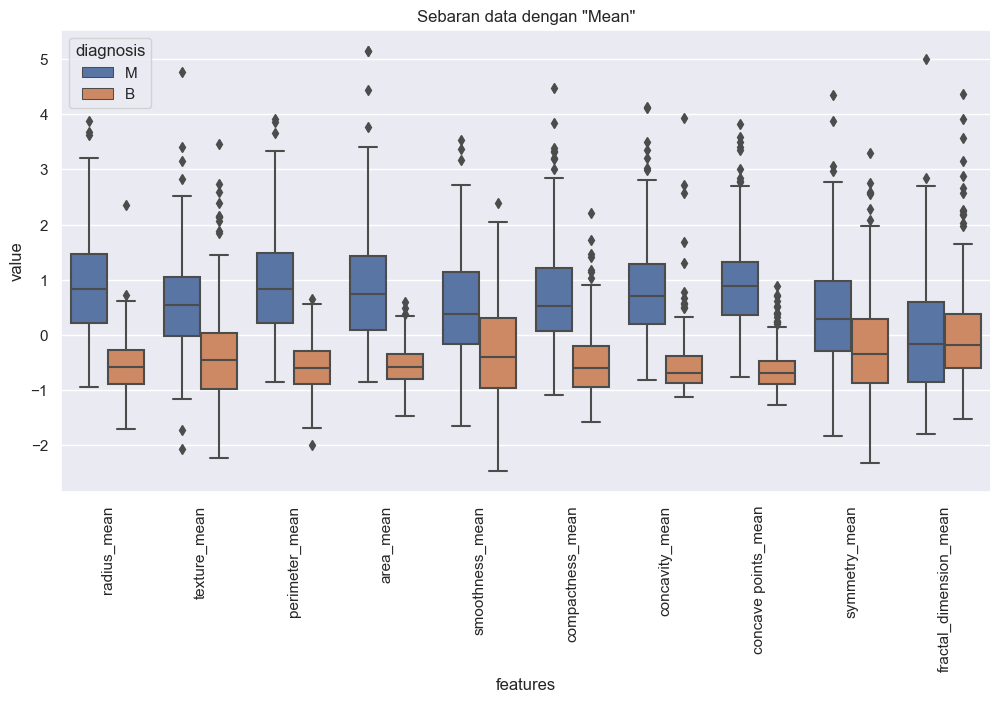

In [73]:
#Slice dataset feature witih "mean" suffix
df_mean = train_df.select_dtypes(['int', 'float']).iloc[:, 0:10]

# standardize
df_mean = (df_mean - df_mean.mean()) / df_mean.std()

# concat the sliced dataset with target class
df_mean = pd.concat([df_mean, train_df[['diagnosis']]], axis=1)
df_mean = pd.melt(df_mean, id_vars='diagnosis', var_name='features', value_name='value')

# box plot visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'features', y = 'value', hue='diagnosis', data=df_mean)
plt.xticks(rotation = 90)

# give title to the plot
plt.title("Sebaran data dengan \"Mean\"")
plt.show()

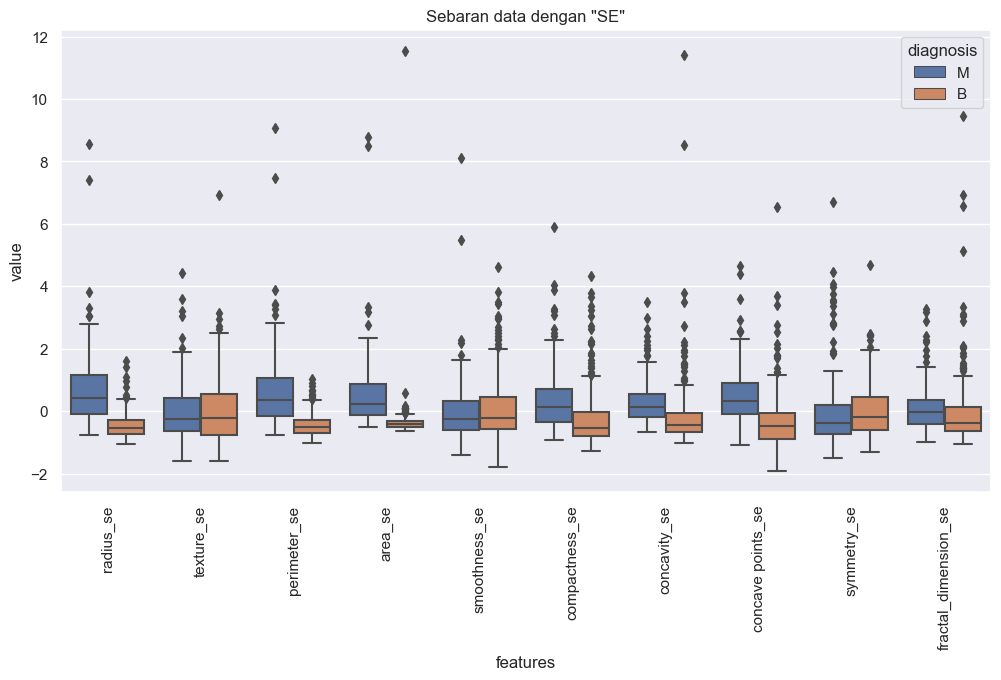

In [74]:
# Slice dataset feature with "se" suffix
df_se = train_df.select_dtypes(['int', 'float']).iloc[:, 10:20]

#standardize
df_se = (df_se - df_se.mean()) / df_se.std()

# concat the sliced dataset with target class
df_se = pd.concat([df_se, train_df[['diagnosis']]], axis=1)
df_se = pd.melt(df_se, id_vars='diagnosis', var_name='features', value_name='value')

# boxplot visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'features', y = 'value', hue='diagnosis', data=df_se)
plt.xticks(rotation = 90)

# give title to the plot
plt.title("Sebaran data dengan \"SE\"")
plt.show()

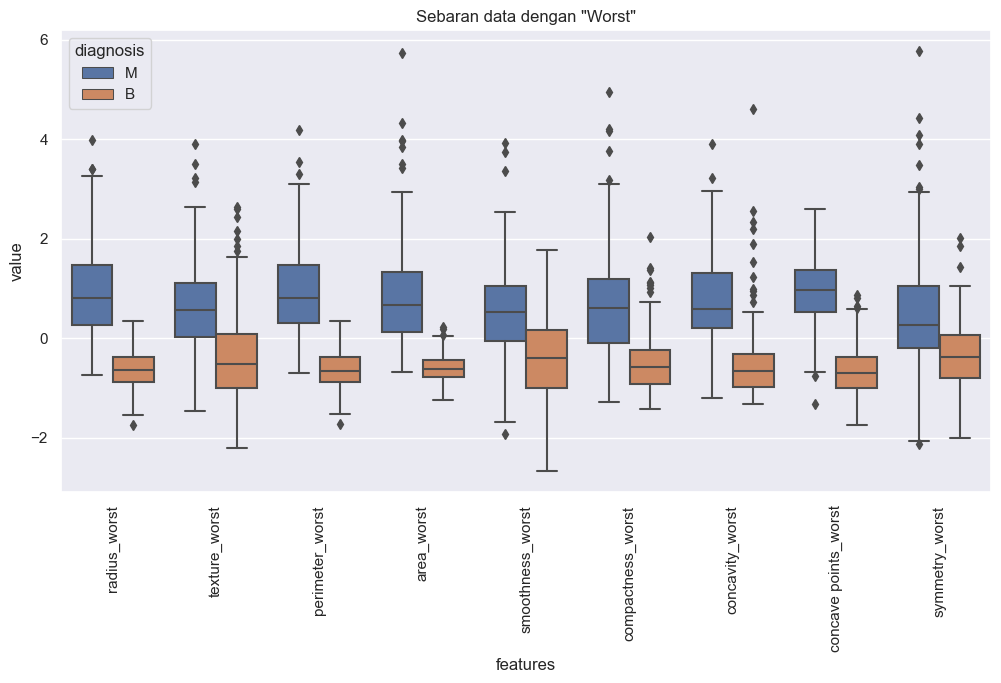

In [75]:
#Slice dataset feature with 'worst' suffix and standardize
df_worst = train_df.select_dtypes(['int', 'float']).iloc[:, -10:-1]
df_worst = (df_worst - df_worst.mean()) / df_worst.std()

# concat sliced dataset with target class
df_worst = pd.concat([df_worst, train_df[['diagnosis']]], axis=1)
df_worst = pd.melt(df_worst, id_vars='diagnosis', var_name='features', value_name='value')

# boxplot visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'features', y = 'value', hue='diagnosis', data=df_worst)
plt.xticks(rotation = 90)

# give title to the plot
plt.title("Sebaran data dengan \"Worst\"")
plt.show()

In [76]:
# pisahkan fitur class dengan fitur prediktor
X, y = train_df.iloc[:, 1:], train_df.iloc[:, 0]

## mapping fitur diagnose
# malignant menjadi kelas positif dan benign menjadi kelas negatif
diagnose_map = {"M": 1, "B": 0}
y.replace(diagnose_map, inplace=True)

In [77]:
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.model_selection import train_test_split # for splitting into train and validation

# standardize all of feature
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X)

# split into train and val
ori_X_train, ori_X_val, y_train, y_val = train_test_split(scaled_X_train, y, train_size = 0.7, random_state = 51, stratify=y)

# make a copy just in case
X_train = ori_X_train.copy()
X_val = ori_X_val.copy()

In [78]:
# standardize also for test data
scaler_test = StandardScaler()
scaled_X_test = scaler.fit_transform(X_test)

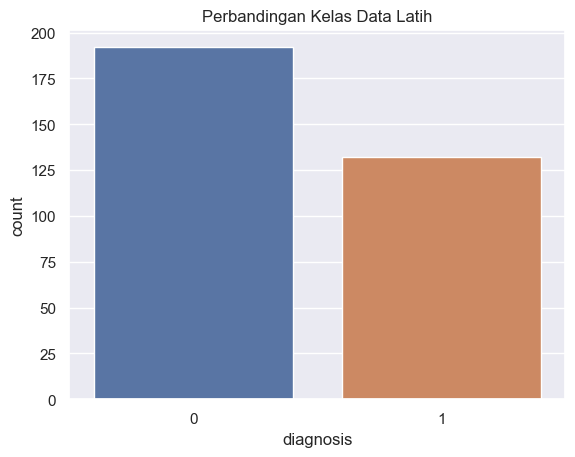

In [79]:
# Class in training data
sns.countplot(pd.DataFrame(y_train), x = 'diagnosis')

# give title to the plot
plt.title("Perbandingan Kelas Data Latih")
plt.show()

In [80]:
from tpot import TPOTClassifier # import for TPOT

# initialize TPOT Object with 100 generation and 100 population size
pipeline_optimizer = TPOTClassifier(generations=100, population_size=100, cv=5,
                                    random_state=42, verbosity=2, n_jobs = -1, early_stop = 5, scoring = ['accuracy', 'recall'])

# train the TPOT with training data
pipeline_optimizer.fit(X_train, y_train)

# output the accuracy for validation data
pipeline_optimizer.score(X_val, y_val)

                                                                                  
Generation 1 - Current best internal CV score: 0.9753365384615386
                                                                                  
Generation 2 - Current best internal CV score: 0.9753365384615386
                                                                                  
Generation 3 - Current best internal CV score: 0.9753365384615386
                                                                                  
Generation 4 - Current best internal CV score: 0.9784134615384616
                                                                                  
Generation 5 - Current best internal CV score: 0.9784134615384616
                                                                                  
Generation 6 - Current best internal CV score: 0.9784134615384616
                                                                                  
Generation 7 - Current 

0.9640287769784173

In [81]:
from sklearn.metrics import recall_score, accuracy_score # to measure recall and accuracy

# use the trained model to predict in validation data
pred = pipeline_optimizer.predict(X_val)

# measure accuracy and recall score
acc = accuracy_score(y_val, pred)
recall = recall_score(y_val, pred)

# output accuracy and recall for report
print(f"Accuracy from TPOT\t: {round(acc*100, 2)}%")
print(f"Recall from TPOT\t: {round(recall * 100, 2)}%")

Accuracy from TPOT	: 96.4%
Recall from TPOT	: 91.07%


# Stacking

In [82]:
from sklearn.neighbors import KNeighborsClassifier # base model KNN
from sklearn.ensemble import RandomForestClassifier # base model Random Forest
from sklearn.linear_model import LogisticRegression # base model logistic regression

# initiate base models
knn = KNeighborsClassifier(n_neighbors=5)
forest = RandomForestClassifier(n_estimators=100)
logreg = LogisticRegression()

# train base models with training data
knn.fit(X_train, y_train)
forest.fit(X_train, y_train)
logreg.fit(X_train, y_train)

# save the prediction from train, val, test for stacking
pred_train = np.array([knn.predict(X_train), forest.predict(X_train), logreg.predict(X_train)]).T
pred_val = np.array([knn.predict(X_val), forest.predict(X_val), logreg.predict(X_val)]).T
pred_test = np.array([knn.predict(scaled_X_test), forest.predict(scaled_X_test), logreg.predict(scaled_X_test)]).T

# output performance from each base models
print(f"{'='*8} Akurasi Base Model Terhadap Data Validasi {'='*8}")
print(f"KNN\t\t\t: {knn.score(X_val, y_val)}")
print(f"Random Forest\t\t: {forest.score(X_val, y_val)}")
print(f"Logistic Regression\t: {logreg.score(X_val, y_val)}")

print()

print(f"{'='*8} Recall Base Model Terhadap Data Validasi {'='*8}")
print(f"KNN\t\t\t: {recall_score(y_val, knn.predict(X_val))}")
print(f"Random Forest\t\t: {recall_score(y_val, forest.predict(X_val))}")
print(f"Logistic Regression\t: {recall_score(y_val, logreg.predict(X_val))}")

======== Akurasi Base Model Terhadap Data Validasi ========
KNN			: 0.9712230215827338
Random Forest		: 0.9496402877697842
Logistic Regression	: 0.9712230215827338

======== Recall Base Model Terhadap Data Validasi ========
KNN			: 0.9464285714285714
Random Forest		: 0.9464285714285714
Logistic Regression	: 0.9285714285714286


In [83]:
# stacking prediction into data train, data validation and data test
X_train = np.hstack((X_train, pred_train))
X_val = np.hstack((X_val, pred_val))
scaled_X_test = np.hstack((scaled_X_test, pred_test))

In [84]:
## using autoML for determine what is the best model

# initialize TPOT Object with 100 generations and 100 population size
pipeline_optimizer = TPOTClassifier(generations=100, population_size=100, cv=5,
                                    random_state=42, verbosity=2, n_jobs = -1, early_stop = 5)

# train the tpot with training data
pipeline_optimizer.fit(X_train, y_train)

# output accuracy model on validation data
pipeline_optimizer.score(X_val, y_val)

                                                                                
Best pipeline: GaussianNB(input_matrix)


0.9568345323741008

In [85]:
# save prediction validation data
pred = pipeline_optimizer.predict(X_val)

# measure accuracy and recall
acc = accuracy_score(y_val, pred)
recall = recall_score(y_val, pred)

# output accuracy and recall for report
print(f"Accuracy from TPOT\t: {round(acc*100, 2)}%")
print(f"Recall from TPOT\t: {round(recall * 100, 2)}%")

Accuracy from TPOT	: 95.68%
Recall from TPOT	: 96.43%


In [86]:
## predict and prepare predicted data for stacking
# expand dims is used to convert prediction from 1 D array to 2D array
pred_train = np.expand_dims(pipeline_optimizer.predict(X_train), axis = 1)
pred_val = np.expand_dims(pipeline_optimizer.predict(X_val), axis = 1)
pred_test = np.expand_dims(pipeline_optimizer.predict(scaled_X_test), axis = 1)

# stacking
X_train = np.hstack((X_train, pred_train))
X_val = np.hstack((X_val, pred_val))
scaled_X_test = np.hstack((scaled_X_test, pred_test))

# PCA

In [87]:
# experiment automl using PCA feature extraction and pass it into automl
import prince

# init PCA transformation object for both training and validatoin data
pca_train = prince.PCA(n_components=3)
pca_val = prince.PCA(n_components= 3)

# transform train and validatoin data
pca_X_train = pca_train.fit_transform(pd.DataFrame(X_train))
pca_X_val = pca_val.fit_transform(pd.DataFrame(X_val))

In [88]:
# initialize tpot model with 100 generations and 100 population size
pipeline_optimizer = TPOTClassifier(generations=100, population_size=100, cv=5,
                                    random_state=42, verbosity=2, n_jobs = -1, early_stop = 5)

# train TPOT with PCA training data
pipeline_optimizer.fit(pca_X_train, y_train)

# output accuracy for pca validatoin data
pipeline_optimizer.score(pca_X_val, y_val)

                                                                                 
Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=1, weights=distance)


0.9568345323741008

In [89]:
# apply pca for test data
pca_test = prince.PCA(n_components=3)
pca_X_test = pca_test.fit_transform(pd.DataFrame(scaled_X_test))

# output confusion matrix and accuracy
print(confusion_matrix(y_val, pipeline_optimizer.predict(pca_X_val)))

pred = pipeline_optimizer.predict(pca_X_val)

# measure accuracy and recall
acc = accuracy_score(y_val, pred)
recall = recall_score(y_val, pred)

# output accuracy and recall for report
print(f"Accuracy from TPOT\t: {round(acc*100, 2)}%")
print(f"Recall from TPOT\t: {round(recall * 100, 2)}%")

[[79  4]
 [ 2 54]]
Accuracy from TPOT	: 95.68%
Recall from TPOT	: 96.43%


In [90]:
# save predicted data for each train, validatoin, and test
pred_train = pipeline_optimizer.predict(pca_X_train)
pred_val = pipeline_optimizer.predict(pca_X_val)
pred_test = pipeline_optimizer.predict(pca_X_test)

# prepare predicted data for stacking
pred_train = np.expand_dims(pred_train, axis = 1)
pred_val = np.expand_dims(pred_val, axis = 1)
pred_test = np.expand_dims(pred_test, axis = 1)

# stacking
X_train = np.hstack((X_train, pred_train))
X_val = np.hstack((X_val, pred_val))
scaled_X_test = np.hstack((scaled_X_test, pred_test))

In [91]:
## Author will make 2 sheets. One original dataset with only final predictions
# other one with the stacking progress and final predictions

# copy dataset
stacked_X_test = X_test.copy()

# separate the prediction, which in last column
final_pred = scaled_X_test[:, -1]

# assign final prediction into the dataset excel wannabe
X_test['final_prediction'] = final_pred

In [92]:
# separate base model and meta learner predictions
knn_pred, forest_pred, logreg_pred, tpot_pred, tpot_pca_pred = scaled_X_test[:, -5:].T

# assign the prediction of base model and meta learner into dataset
stacked_X_test['knn_pred'] = knn_pred
stacked_X_test['forest_pred'] = forest_pred
stacked_X_test['logreg_pred'] = logreg_pred
stacked_X_test['tpot_pred'] = tpot_pred
stacked_X_test['tpot_pca_pred'] = tpot_pca_pred

In [93]:
# inverse map from int to original label
diagnose_map_inverse = {1 : "M", 0: "B"}

# inverse mapping
X_test['final_prediction'].replace(diagnose_map_inverse, inplace=True)

In [94]:
# write the result dataset into excel file format
with pd.ExcelWriter("test_predicted.xlsx") as writer:
    X_test.to_excel(writer, sheet_name='Final Result', index=False)
    stacked_X_test.to_excel(writer, sheet_name='Stacked Dataset', index=False)